## EDA(Exploratory Data Analysis) and Filling Null's

#### First Import all required Libraries, While others can import at the place of required

In [55]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#### Let's hide the Warnings

In [56]:
import warnings as warnings
warnings.filterwarnings('ignore')

#### Now importing the Dataset using Pandas

In [57]:
df=pd.read_csv('synthetic_dataset_10000x20.csv')

#### Check the first five Rows of Data

In [58]:
df.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


#### Let's see shape of the data

In [59]:
print('Number of Columns in Data :',df.shape[1])

Number of Columns in Data : 21


In [60]:
print('Number of Rows in Data :',df.shape[0])

Number of Rows in Data : 10000


We can Observe data is in shape of 10,000x20 in which 20 columns are Independent columns and 1 column is of Dependent column or target column.
#### Now lets check Data type of each column

In [61]:
df.dtypes

customer_id             object
age                      int64
income                 float64
savings                float64
monthly_expenses       float64
num_dependents           int64
credit_score           float64
loan_amount            float64
loan_term_months         int64
employment_years       float64
home_ownership          object
education               object
marital_status          object
region                  object
recent_default           int64
has_credit_card          int64
signup_date             object
signup_dayofweek         int64
debt_to_income         float64
sin_age                float64
target_default_risk      int64
dtype: object

We can observe that data have int, float values and with strings which we should do Feature engineering to consider each column for high accuracy.
#### Lets check each column's mean, standard deviation, maximum value, minimum value(it gives only for integer type data columns)

In [62]:
df.describe()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,has_credit_card,signup_dayofweek,debt_to_income,sin_age,target_default_risk
count,10000.000000,9682.000000,9689.000000,9675.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.861600,59712.871411,5039.922489,2082.209612,1.214200,650.155438,16214.796900,45.642000,5.39701,0.047000,0.694800,3.011900,0.358156,-0.100387,0.513200
std,16.457987,39865.231489,5041.793583,1385.991787,1.108982,69.918297,16081.646814,15.475134,3.41370,0.211649,0.460515,2.003986,0.302606,0.667428,0.499851
min,18.000000,20001.000000,0.000000,200.000000,0.000000,363.077116,1000.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.004000,-0.999923,0.000000
25%,32.000000,31300.500000,1476.000000,1471.000000,0.000000,602.189895,8508.500000,36.000000,2.70000,0.000000,0.000000,1.000000,0.132000,-0.756802,0.000000
50%,46.000000,47301.500000,3499.000000,2007.000000,1.000000,649.808322,15174.500000,48.000000,5.10000,0.000000,1.000000,3.000000,0.275000,-0.157746,1.000000
75%,60.000000,75164.250000,6986.000000,2557.000000,2.000000,697.537432,21843.750000,60.000000,7.70000,0.000000,1.000000,5.000000,0.508000,0.515501,1.000000
max,74.000000,402769.000000,44644.000000,28664.000000,7.000000,850.000000,441190.000000,72.000000,21.50000,1.000000,1.000000,6.000000,2.031000,0.973848,1.000000


#### Cross check if our data have any NULL values

In [63]:
df.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

In [64]:
df.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


#### We can observe 4 columns have NULL values which we should remove them using following code

In [65]:
for i in df.columns:
    if df[i].isnull().sum() != 0:
        df[i] = df[i].fillna(df[i].mean())

#### We filled all the null values using above code and one's check the null values

In [66]:
df.isnull().sum()

customer_id            0
age                    0
income                 0
savings                0
monthly_expenses       0
num_dependents         0
credit_score           0
loan_amount            0
loan_term_months       0
employment_years       0
home_ownership         0
education              0
marital_status         0
region                 0
recent_default         0
has_credit_card        0
signup_date            0
signup_dayofweek       0
debt_to_income         0
sin_age                0
target_default_risk    0
dtype: int64

Successfully, We removed all null values

### Lets Devide Numerical and Categorical Columns
#### Numerical Columns(in Numerical columns there are data type with integer(int) and flaot columns)

#### 1.Numerical columns of integer type

In [67]:
for i in df.columns:
    if pd.api.types.is_integer_dtype(df[i]):
        print(i)

age
num_dependents
loan_term_months
recent_default
has_credit_card
signup_dayofweek
target_default_risk


#### Checking unique values in each Numerical colums of integer type

In [68]:
for i in df.columns:
    if pd.api.types.is_integer_dtype(df[i]):
        print(i,':')
        print(df[i].unique())
        print('-----------------------')

age :
[30 22 68 49 74 56 19 44 18 29 53 40 41 42 58 66 72 69 27 47 70 38 50 23
 20 34 54 73 60 59 55 64 33 51 45 43 65 62 71 61 37 25 39 31 48 57 24 46
 21 36 52 32 26 28 63 35 67]
-----------------------
num_dependents :
[2 1 0 3 4 5 6 7]
-----------------------
loan_term_months :
[48 36 72 60 24 12]
-----------------------
recent_default :
[1 0]
-----------------------
has_credit_card :
[1 0]
-----------------------
signup_dayofweek :
[6 2 1 3 5 4 0]
-----------------------
target_default_risk :
[1 0]
-----------------------


#### Conting how many unique values are there in each Numerical Columns of integer type

In [69]:
for i in df.columns:
    if pd.api.types.is_integer_dtype(df[i]):
        print(df[i].value_counts())
        print('---------------------')

age
73    209
54    209
53    199
36    194
34    192
48    191
46    190
25    189
21    187
20    186
58    186
35    186
49    185
26    185
38    182
32    182
28    182
63    181
74    181
40    180
47    180
70    179
56    178
50    177
19    177
57    177
22    177
42    176
33    174
60    174
24    174
29    174
71    172
64    170
45    170
37    170
61    169
30    169
62    169
31    168
27    168
66    167
23    166
69    166
59    165
72    165
18    165
43    164
52    164
41    164
55    163
68    163
39    162
67    159
51    154
65    148
44    147
Name: count, dtype: int64
---------------------
num_dependents
1    3603
0    2984
2    2166
3     891
4     275
5      57
6      19
7       5
Name: count, dtype: int64
---------------------
loan_term_months
48    2998
36    2523
60    2008
72    1003
24     948
12     520
Name: count, dtype: int64
---------------------
recent_default
0    9530
1     470
Name: count, dtype: int64
---------------------
has_credit_card
1    

#### 2. Numerical columns of Float type

In [70]:
for i in df.columns:
    if pd.api.types.is_float_dtype(df[i]):
        print(i)

income
savings
monthly_expenses
credit_score
loan_amount
employment_years
debt_to_income
sin_age


#### Checking unique values in each Numerical column of Flaot type

In [71]:
for i in df.columns:
    if pd.api.types.is_float_dtype(df[i]):
        print(i,':')
        print(df[i].unique())
        print('---------------------------------------------')

income :
[66737. 70740. 38890. ... 44507. 20651. 38273.]
---------------------------------------------
savings :
[11155.   997.  1929. ...  3848. 18880.  6201.]
---------------------------------------------
monthly_expenses :
[2272. 1934. 1696. ...  647. 2520. 1310.]
---------------------------------------------
credit_score :
[605.07620415 683.2919671  658.00335996 ... 655.56274771 653.27764482
 663.9755557 ]
---------------------------------------------
loan_amount :
[26965.  4681. 12633. ... 31089.  8977. 24319.]
---------------------------------------------
employment_years :
[ 3.9  0.7  2.2  2.7 10.3  1.3  6.7  0.5  2.1  6.  10.5  8.6  8.8  9.3
  9.   5.8  9.4  5.   8.1  4.8  1.5 11.1  3.5  7.8  4.6  7.7  8.2  3.6
  5.4  1.4  3.8  1.9  6.4 11.5  9.2  3.3  8.9 13.4  6.5  5.5 10.   2.9
  2.8  7.1  6.6  2.5  3.   0.2  3.7  9.1  4.5  8.7 17.3  9.8 10.2  7.2
  2.6  5.9  5.2  5.6  4.9  5.1  4.3  5.3 10.9 11.7  4.7 15.3 12.6  2.3
  6.9  1.2  7.5  0.6  7.3  3.1 10.7 12.7 17.7  6.2  0.1  4

#### Lets Count how many unique values in each Numerical column of Float type

In [72]:
for i in df.columns:
    if pd.api.types.is_float_dtype(df[i]):
        print(df[i].value_counts())
        print('-------------------------')

income
59712.871411    318
20702.000000      4
21232.000000      4
23428.000000      3
23029.000000      3
               ... 
44865.000000      1
37348.000000      1
45584.000000      1
38884.000000      1
38273.000000      1
Name: count, Length: 9108, dtype: int64
-------------------------
savings
5039.922489     311
1308.000000       8
275.000000        7
666.000000        6
723.000000        6
               ... 
4065.000000       1
10641.000000      1
9616.000000       1
7509.000000       1
6201.000000       1
Name: count, Length: 6499, dtype: int64
-------------------------
monthly_expenses
2082.209612     325
200.000000      124
1495.000000      14
1528.000000      13
2064.000000      13
               ... 
2891.000000       1
3671.000000       1
740.000000        1
22984.000000      1
1310.000000       1
Name: count, Length: 3069, dtype: int64
-------------------------
credit_score
650.155438    326
850.000000     28
605.076204      1
746.419598      1
746.244853      1
       

#### Categorical Columns

In [73]:
for i in df.columns:
    if pd.api.types.is_string_dtype(df[i]):
        print(i)

customer_id
home_ownership
education
marital_status
region
signup_date


#### Lets check unique values in each Categorical column

In [74]:
for i in df.columns:
    if pd.api.types.is_string_dtype(df[i]):
        print(i,':')
        print(df[i].unique())
        print('-------------------------')

customer_id :
['CUST006253' 'CUST004685' 'CUST001732' ... 'CUST005391' 'CUST000861'
 'CUST007271']
-------------------------
home_ownership :
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
-------------------------
education :
['HS' 'Bachelors' 'Masters' 'Other' 'PhD' 'Bachlors']
-------------------------
marital_status :
['Single' 'Married' 'Divorced' 'Widowed']
-------------------------
region :
['West' 'East' 'South' 'North']
-------------------------
signup_date :
['2020-07-05' '2018-10-03' '2018-05-30' ... '2018-12-16' '2021-08-03'
 '2019-02-21']
-------------------------


### Fixing categorical inconsistencies (i.e, typos in `education` like "Bachlors").

In [75]:
df['education']=df['education'].replace({'Bachlors':'Bachelors'})

#### And lets Count how many unique values in each Column

In [76]:
for i in df.columns:
    if pd.api.types.is_string_dtype(df[i]):
        print(df[i].value_counts())
        print('-------------------------')

customer_id
CUST006253    1
CUST001238    1
CUST001308    1
CUST009430    1
CUST000999    1
             ..
CUST002729    1
CUST009598    1
CUST004986    1
CUST006847    1
CUST007271    1
Name: count, Length: 10000, dtype: int64
-------------------------
home_ownership
RENT        4524
OWN         2526
MORTGAGE    2498
OTHER        452
Name: count, dtype: int64
-------------------------
education
Bachelors    4530
HS           2546
Masters      1962
Other         500
PhD           462
Name: count, dtype: int64
-------------------------
marital_status
Single      4486
Married     4002
Divorced    1000
Widowed      512
Name: count, dtype: int64
-------------------------
region
East     2553
South    2523
North    2479
West     2445
Name: count, dtype: int64
-------------------------
signup_date
2018-06-22    14
2021-04-14    13
2021-01-27    13
2021-11-14    13
2022-05-07    12
              ..
2023-04-16     1
2022-05-31     1
2020-03-22     1
2022-07-31     1
2018-11-04     1
Name: cou

## Data Visualization

#### Plotting Histogram chart for every Numerical Columns of Intege type

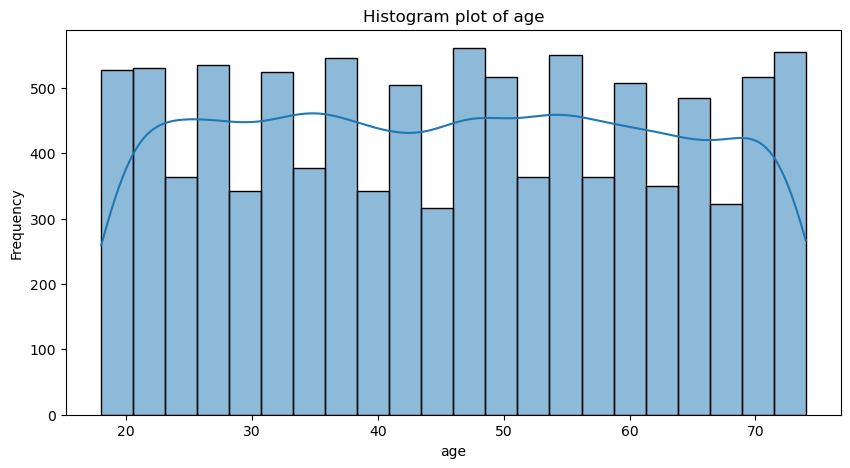

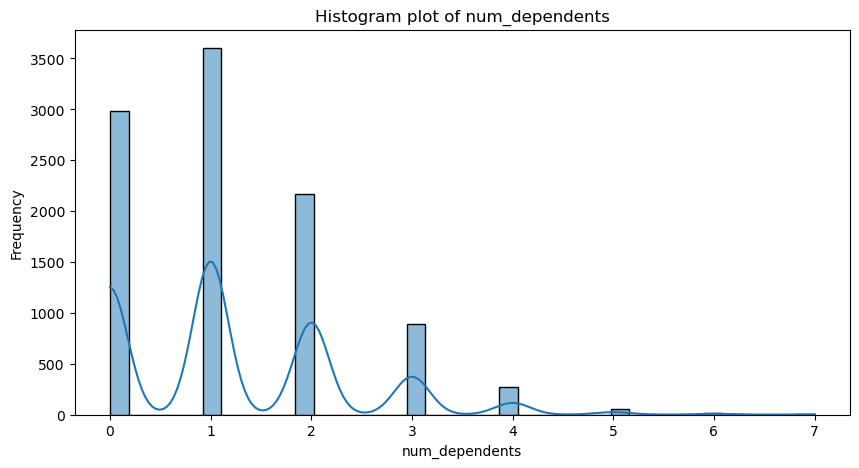

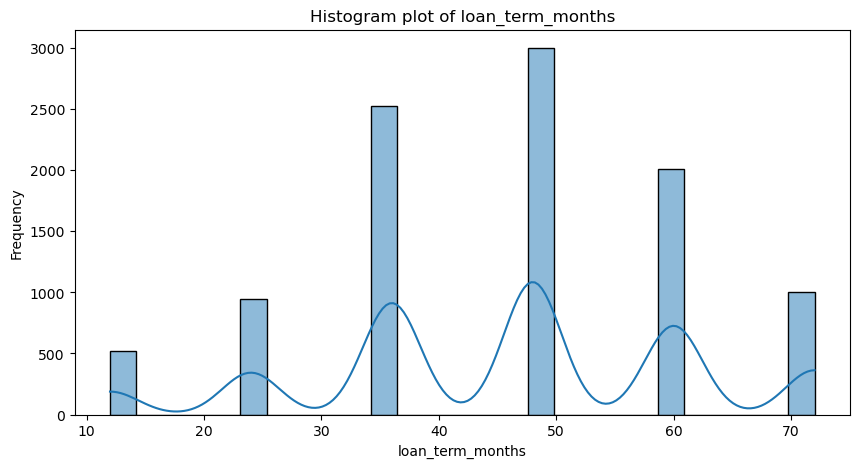

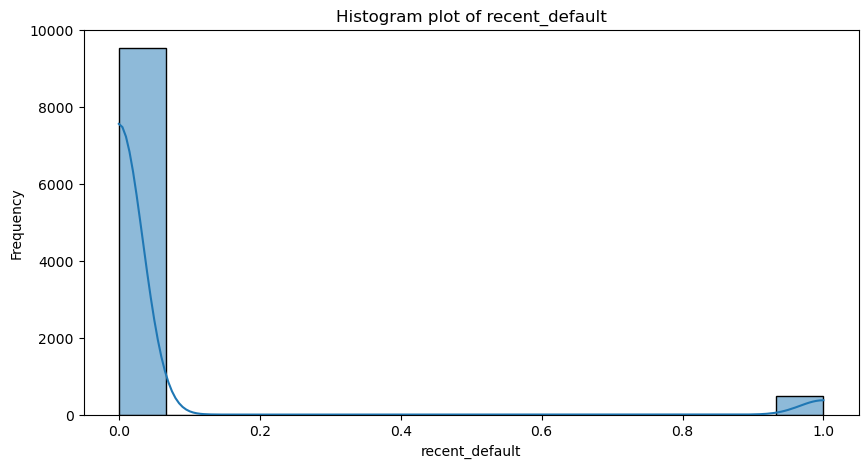

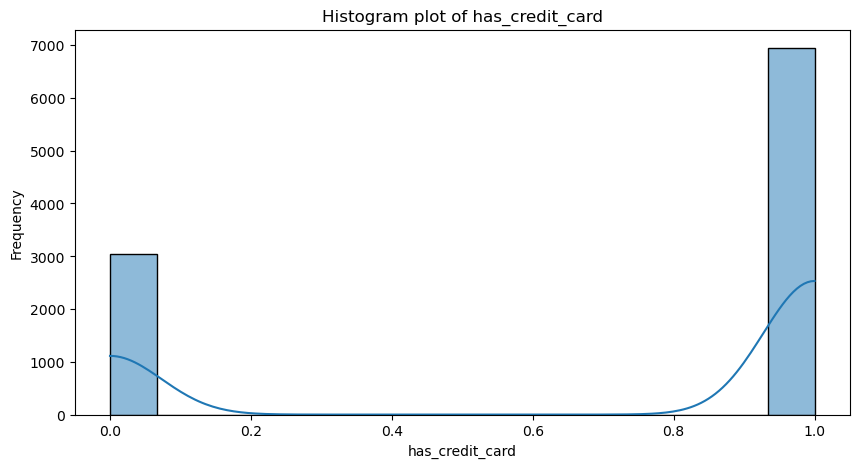

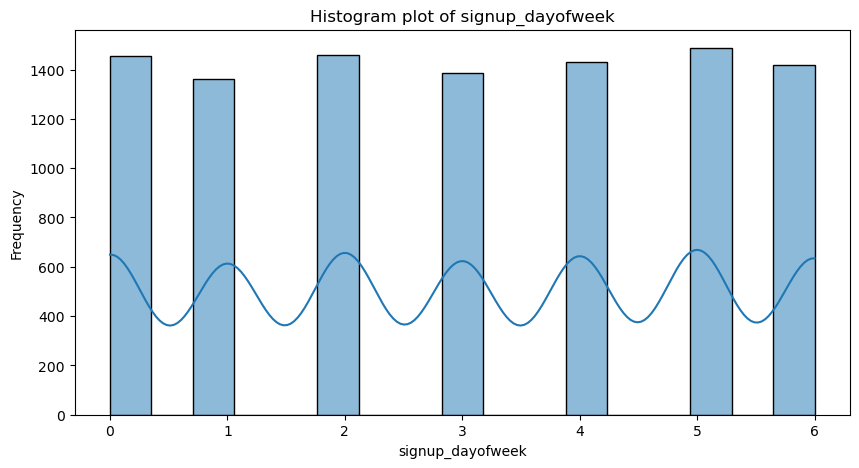

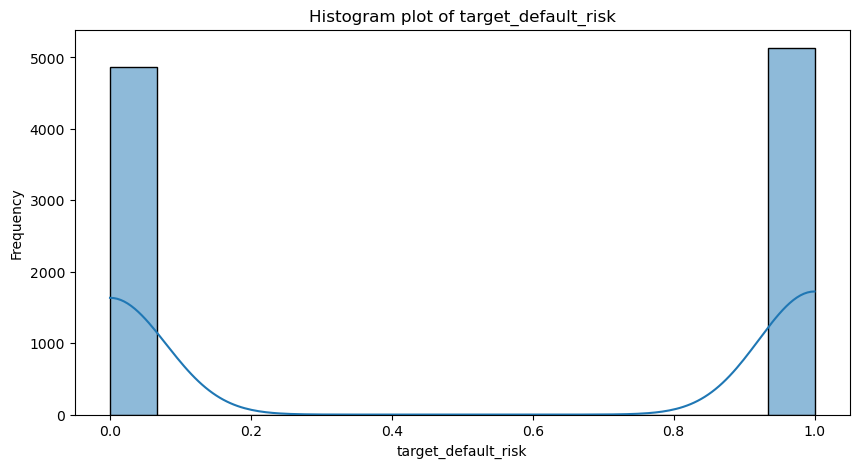

In [77]:
for i in df.columns:
    if pd.api.types.is_integer_dtype(df[i]):
        plt.figure(figsize=(10,5))
        sns.histplot(df[i],kde=True)
        plt.title(f'Histogram plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()

#### Plotting Box plot for every Numerical Columns of Intege type to know is there are outliers or not, If present we can work on it later
(Atlast Note which columns have outliers)

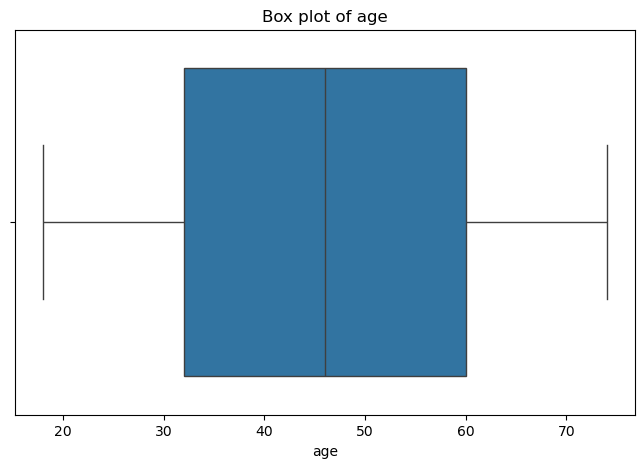

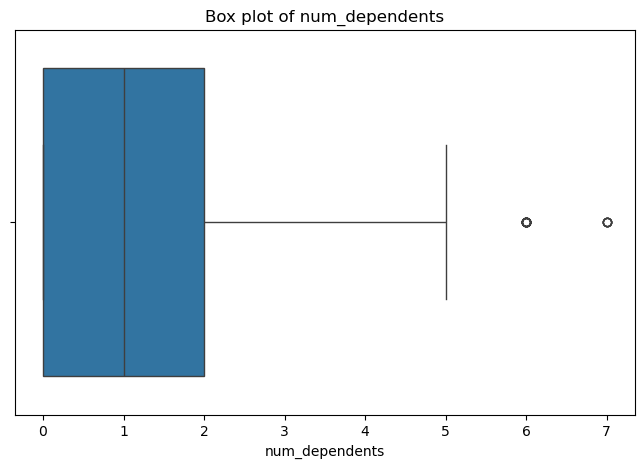

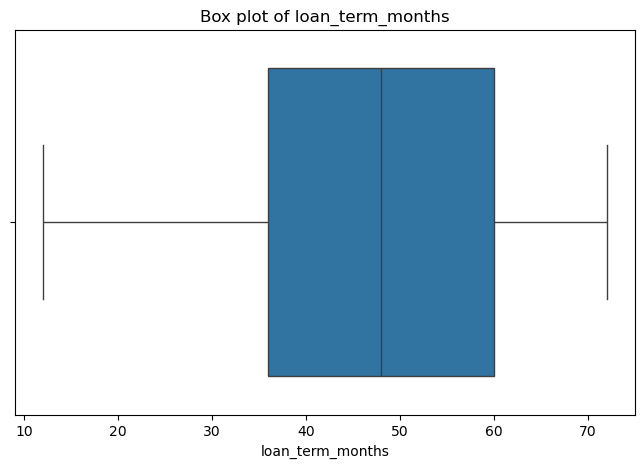

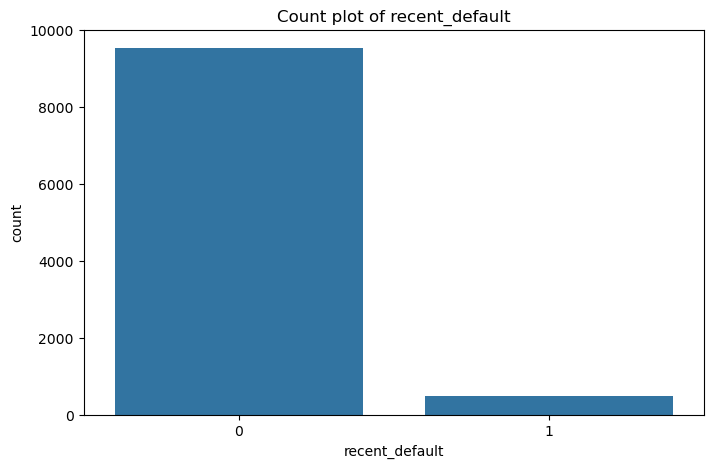

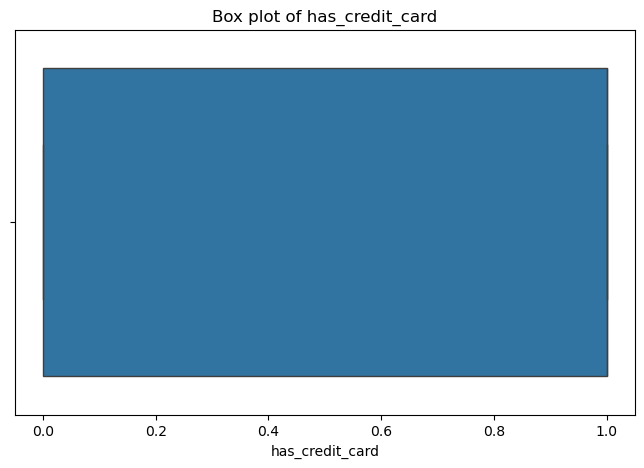

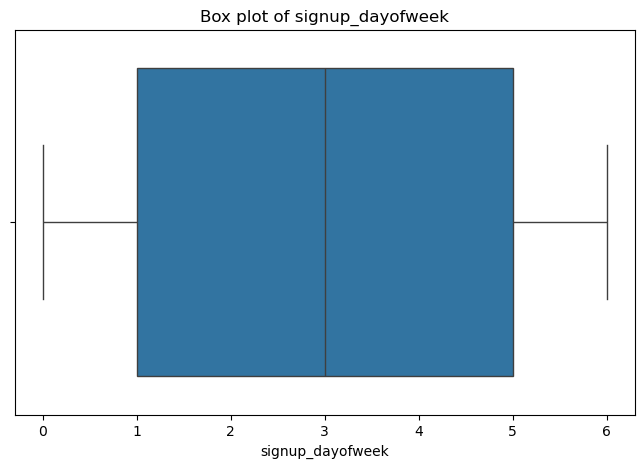

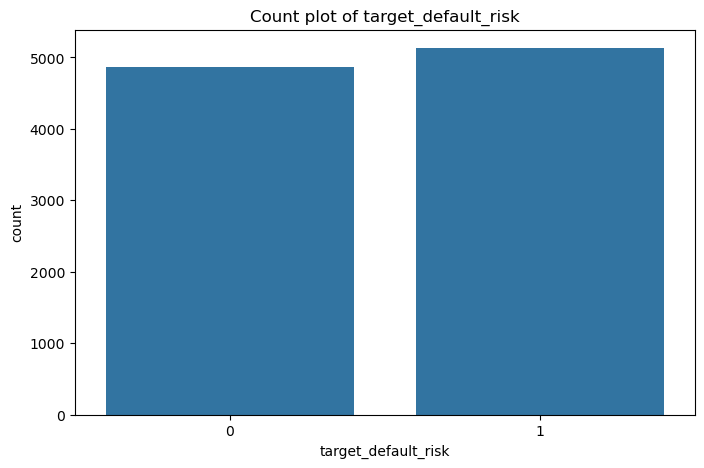

In [78]:
for i in df.columns:
    if pd.api.types.is_integer_dtype(df[i]):
        if i=='recent_default' or i=='target_default_risk': # because these are binary category variables
            plt.figure(figsize=(8,5))
            sns.countplot(x=i, data=df)
            plt.title(f'Count plot of {i}')
            plt.show
        else:
            plt.figure(figsize=(8,5))
            sns.boxplot(x=df[i])
            plt.title(f'Box plot of {i}')
            plt.show()

#### Columns that have outliers:
-> num_dependents

#### Plotting Histogram chart for every Numerical Columns of Float type

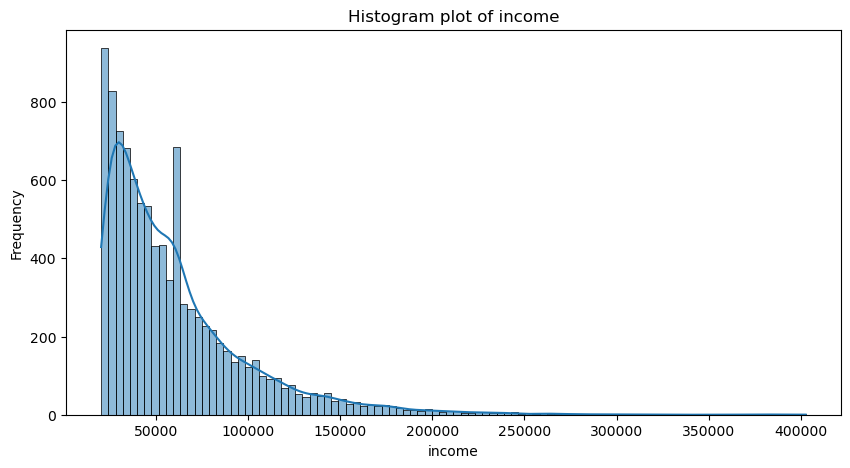

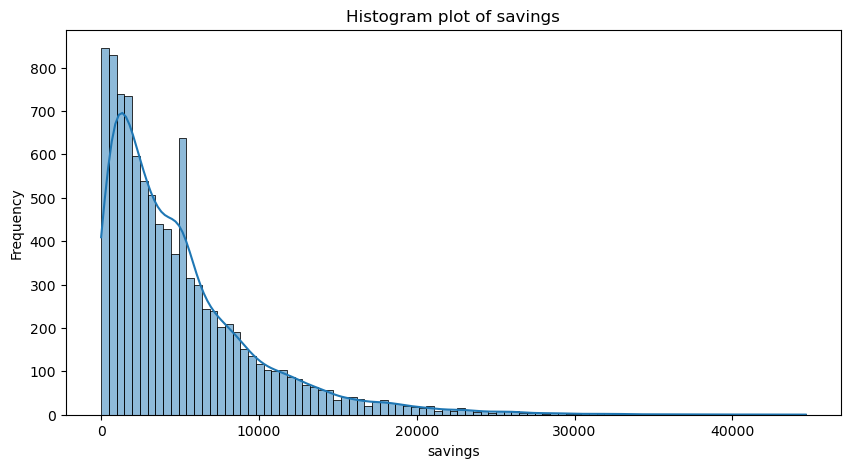

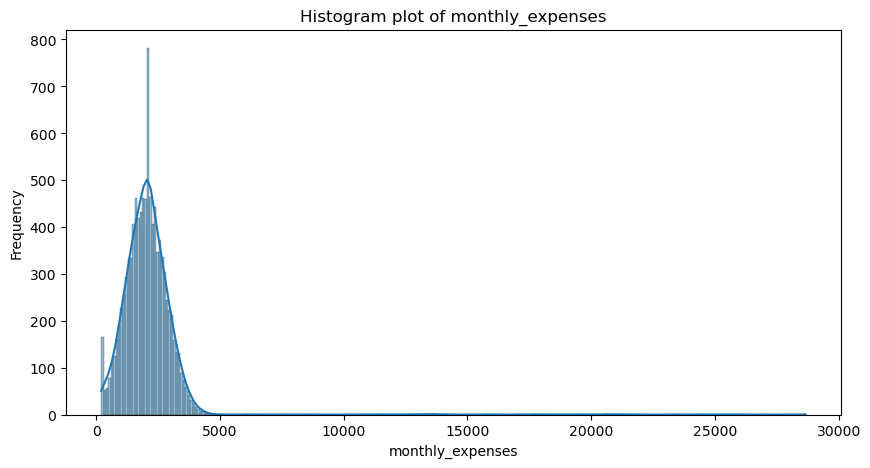

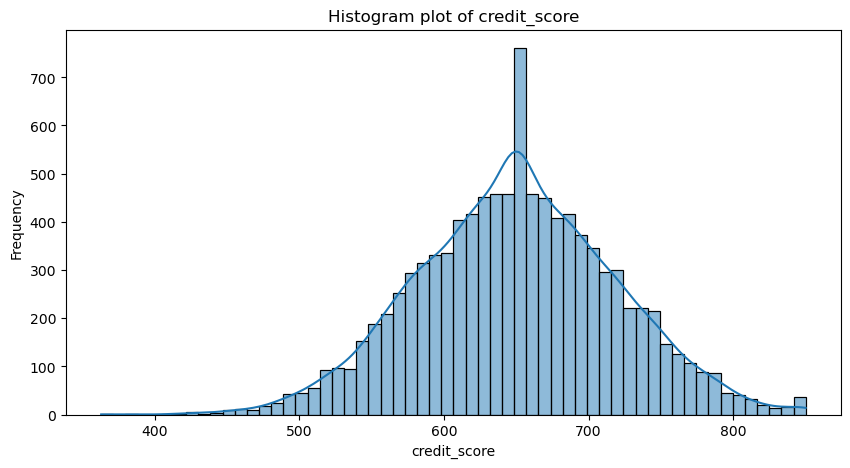

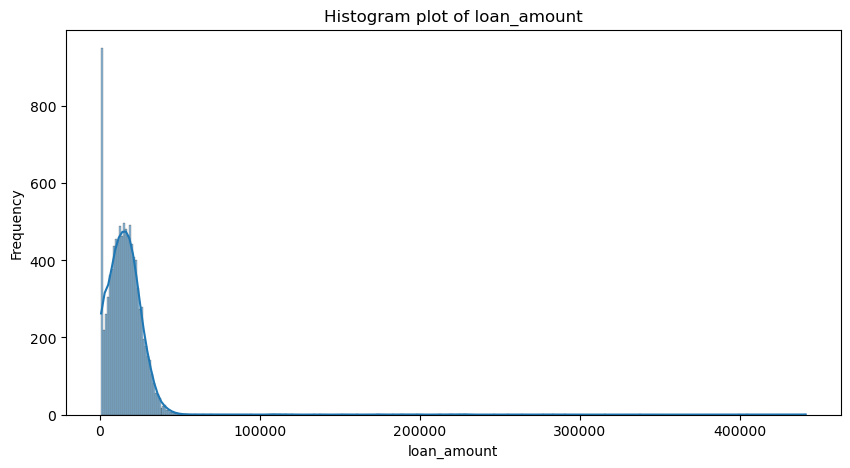

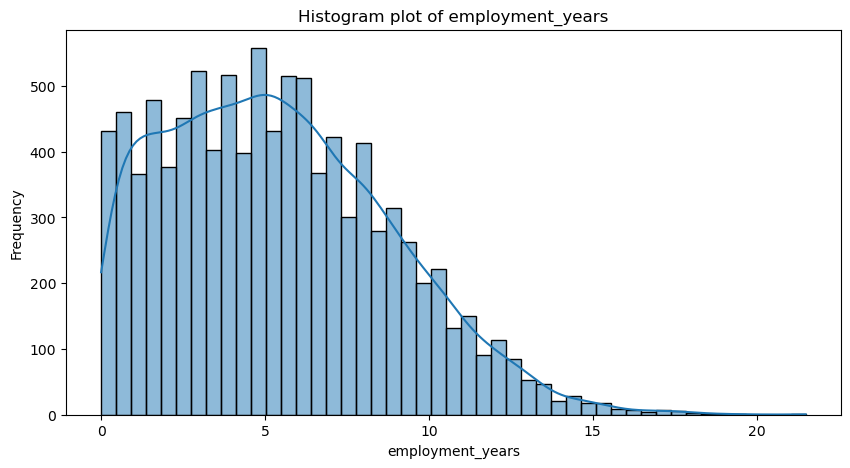

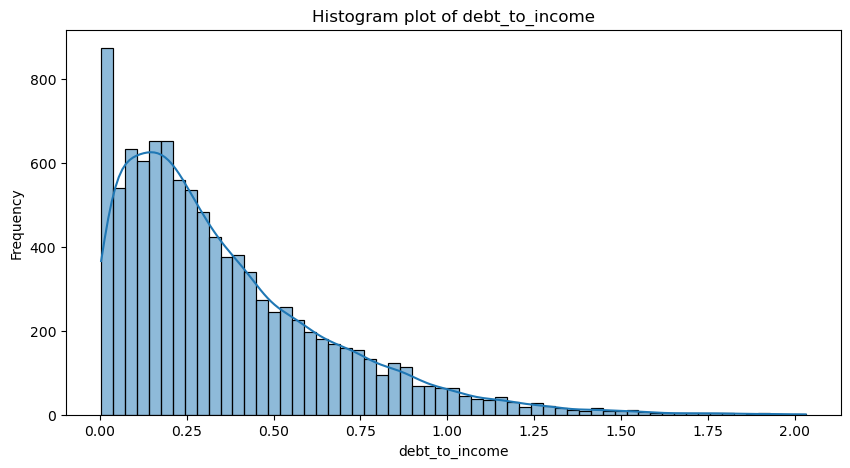

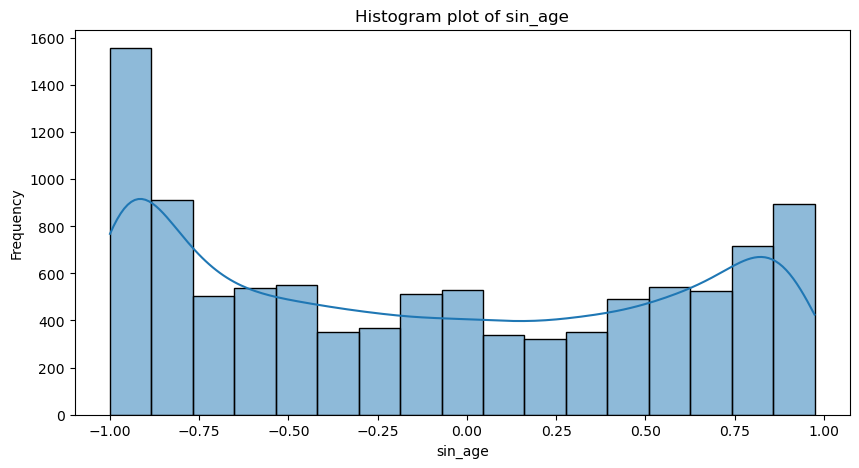

In [79]:
for i in df.columns:
    if pd.api.types.is_float_dtype(df[i]):
        plt.figure(figsize=(10,5))
        sns.histplot(df[i],kde=True)
        plt.title(f'Histogram plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()

#### Plotting Box plot for every Numerical Columns of Float type to know is there are outliers or not, If present we can work on it later
(But note which columns have outliers)

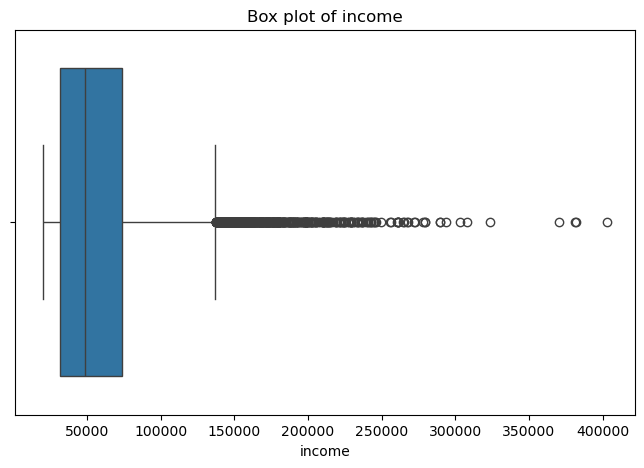

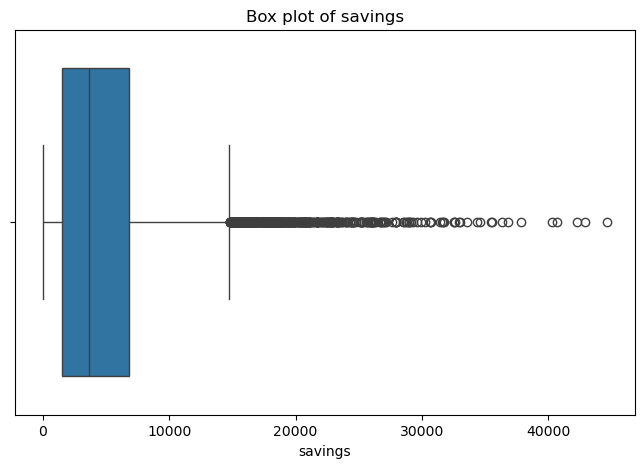

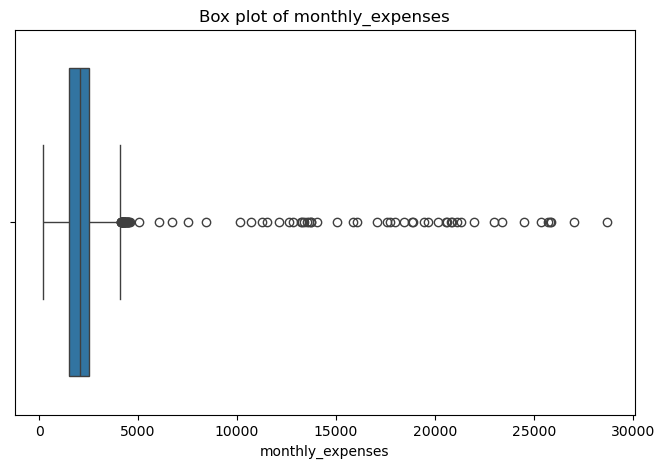

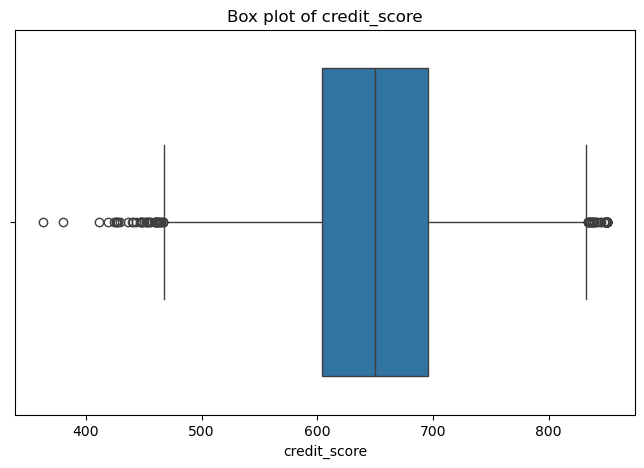

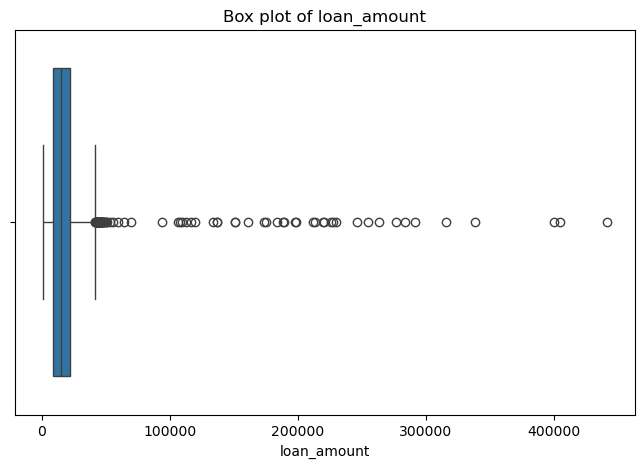

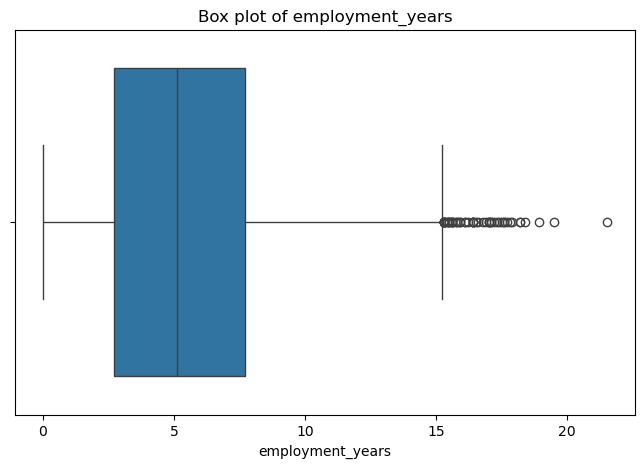

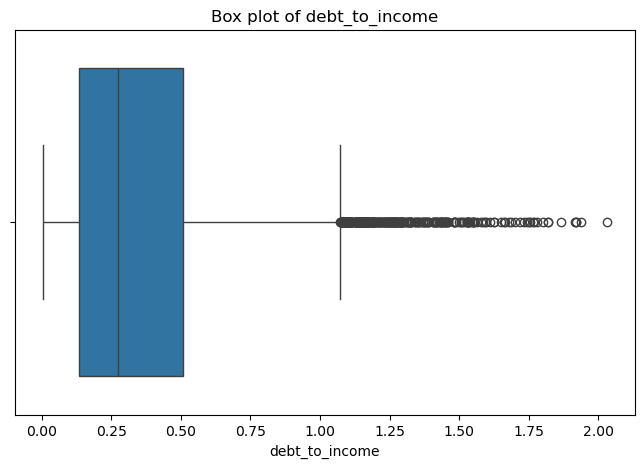

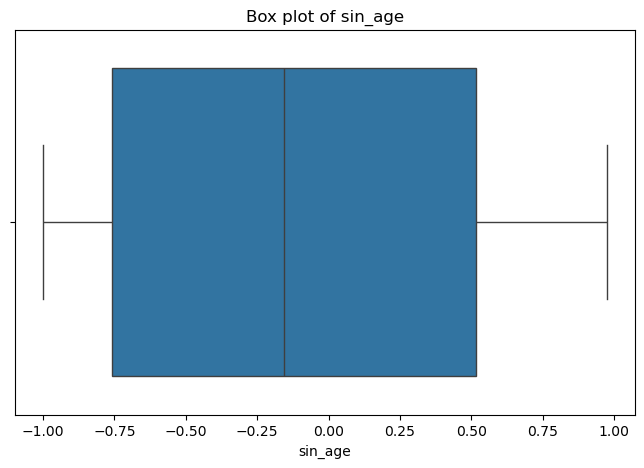

In [80]:
for i in df.columns:
    if pd.api.types.is_float_dtype(df[i]):
        plt.figure(figsize=(8,5))
        sns.boxplot(x=df[i])
        plt.title(f'Box plot of {i}')
        plt.show()

#### Columns that have outliers:
->income
->savings
->montly_expenses
->credit_score
-> loan_amount 
-> employement_years
-> debt_to_income

#### Plotting Box plot for every Categorical Columns, except 'customer_id' and 'signup_date' columns. (Later We can work on type of encoder to apply on these)

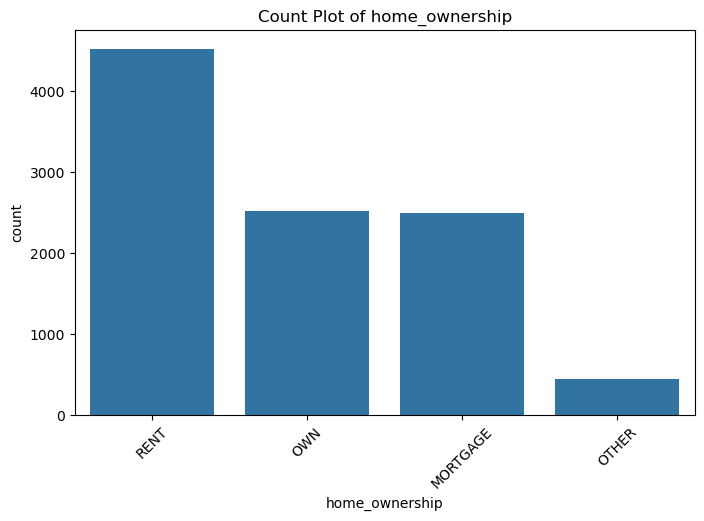

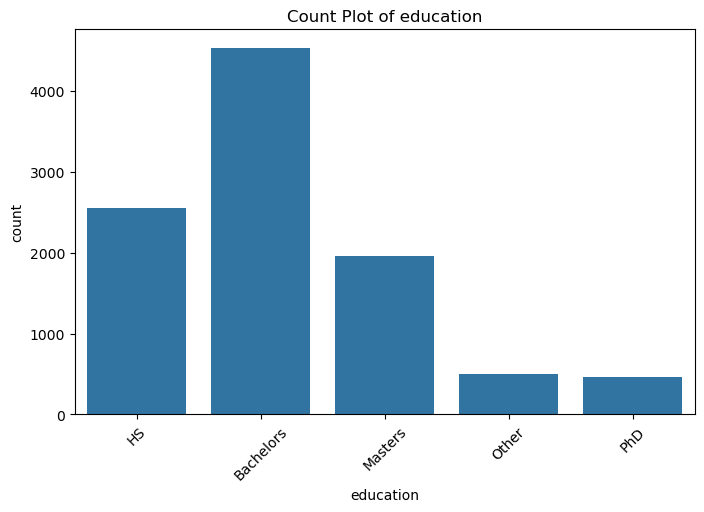

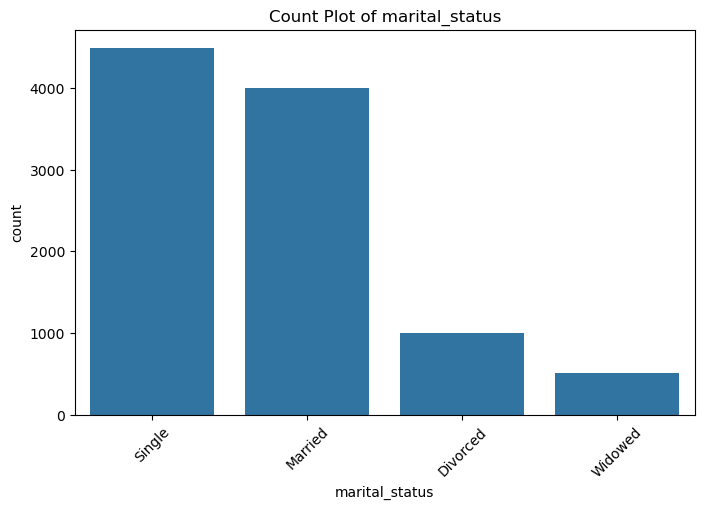

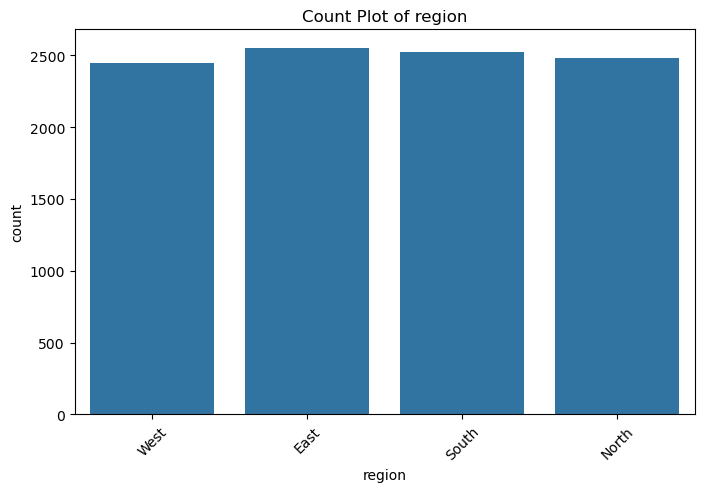

In [81]:
for i in df.columns:
    if pd.api.types.is_string_dtype(df[i]):
        if i=="customer_id" or i=="signup_date":
            pass
        else:
            plt.figure(figsize=(8,5))
            sns.countplot(x=df[i])
            plt.title(f'Count Plot of {i}')
            plt.xticks(rotation=45)
            plt.show()

## Encoding for Categorical Columns

#### There are different encoding techniques(One hot encoding, Ordinal encoding), By checking each categorical column apply required technique

In [82]:
for i in df.columns:
    if pd.api.types.is_string_dtype(df[i]):
        print(i)

customer_id
home_ownership
education
marital_status
region
signup_date


Leaving customer_id,signup_date do Encoding to Remaining ones

#### For 'home_ownership' columns, it has values like RENT, MORTGAGE, OWN, OTHER which is nominal category, Let's go for One Hot Encoding

In [83]:
df.home_ownership.value_counts()

home_ownership
RENT        4524
OWN         2526
MORTGAGE    2498
OTHER        452
Name: count, dtype: int64

In [84]:
home_ownership_ENCODED=pd.get_dummies(df[['home_ownership']],prefix='home',dtype=int)

In [85]:
home_ownership_ENCODED.head()

,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0


#### After appying One hot encoding for 'home_ownership' column add Encoded columns to data using concatation and delete the previous column fom the data

In [86]:
df=pd.concat([df,home_ownership_ENCODED],axis=1)

In [87]:
df.drop('home_ownership',axis=1,inplace=True)

In [88]:
df.shape

(10000, 24)

#### For 'education' columns, it has values like Bachelors, HS, Masters, PhD, OTHER which have some hirarchy comes under Ordinal category, Let's go for Ordinal Encoding

In [89]:
df.education.value_counts()

education
Bachelors    4530
HS           2546
Masters      1962
Other         500
PhD           462
Name: count, dtype: int64

In [90]:
from sklearn.preprocessing import OrdinalEncoder

In [91]:
edu_order=['HS','Bachelors','Masters','PhD','Other']
oe_edu=OrdinalEncoder(categories=[edu_order])

In [92]:
oe_edu

OrdinalEncoder(categories=[['HS', 'Bachelors', 'Masters', 'PhD', 'Other']])

In [93]:
df['education_ENCODED']=oe_edu.fit_transform(df[['education']])

#### After appying tranforming using Ordinal encoder for 'education' column, add new Encoded columns to data as in above and delete the previous column fom the data

In [94]:
df.drop('education',axis=1,inplace=True)

#### For 'marital_status' columns, it has values like Single,Married,Divorced,Widowed which don't have any hirarchy comes under Nominal category, Let's go for One hot Encoding

In [95]:
df.marital_status.value_counts()

marital_status
Single      4486
Married     4002
Divorced    1000
Widowed      512
Name: count, dtype: int64

In [96]:
marital_status_ENCODED=pd.get_dummies(df[['marital_status']],prefix='marital',dtype=int)

In [97]:
marital_status_ENCODED.head()

,marital_Divorced,marital_Married,marital_Single,marital_Widowed
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


#### After appying One hot encoding for 'marital_status' column, add Encoded columns to data using concatation and delete the previous column fom the data

In [98]:
df=pd.concat([df,marital_status_ENCODED],axis=1)

In [99]:
df.drop('marital_status',axis=1,inplace=True)

#### Once let's check the Shape of data

In [100]:
df.shape

(10000, 27)

#### For 'region' columns, it has values like East,South,North,West which have'nt an hirarchy,so comes under Nominal category, Let's go for One hot Encoding

In [101]:
df.region.value_counts()

region
East     2553
South    2523
North    2479
West     2445
Name: count, dtype: int64

In [102]:
region_ENCODED=pd.get_dummies(df[['region']],prefix='region',dtype=int)

In [103]:
region_ENCODED.head()

,region_East,region_North,region_South,region_West
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1


In [104]:
df=pd.concat([df,region_ENCODED],axis=1)

#### After appying One hot encoding for 'region' column, add Encoded columns to data using concatation and delete the previous column fom the data

In [105]:
df.drop('region',axis=1,inplace=True)

#### Once check the shape and data

In [106]:
df.shape

(10000, 30)

In [107]:
df.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,home_RENT,education_ENCODED,marital_Divorced,marital_Married,marital_Single,marital_Widowed,region_East,region_North,region_South,region_West
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,1,0.0,0,0,1,0,0,0,0,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,1,1.0,0,1,0,0,1,0,0,0
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,0,1.0,0,0,1,0,1,0,0,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,0,0.0,0,1,0,0,0,0,1,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,0,2.0,0,0,1,0,0,0,0,1


### After Encoding techniques for Categorical columns we have data with 10000 rows(remains same) and 27 columns(changed due adding new columns)

## Now let's do Work on OUtliers

#### We know Outliers are in folloing Columns 'num_dependents','income','savings','monthly_expenses','credit_score','loan_amounts','employement_years','debt_to_income'(As we discussed earlier from Box plotting)
Let's Cap them instead of Removing

Before Capping: num_dependents


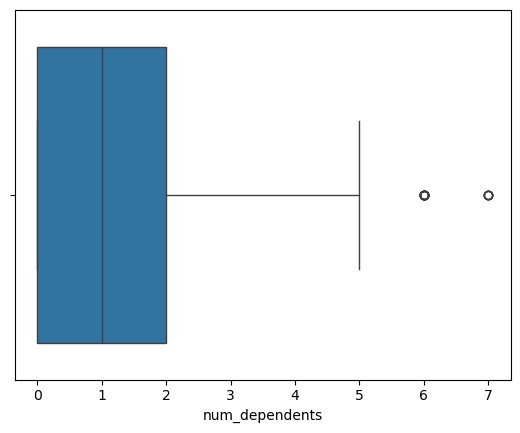

After Capping: num_dependents


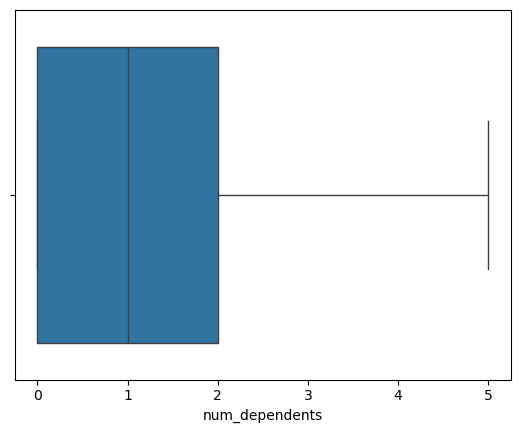

Before Capping: income


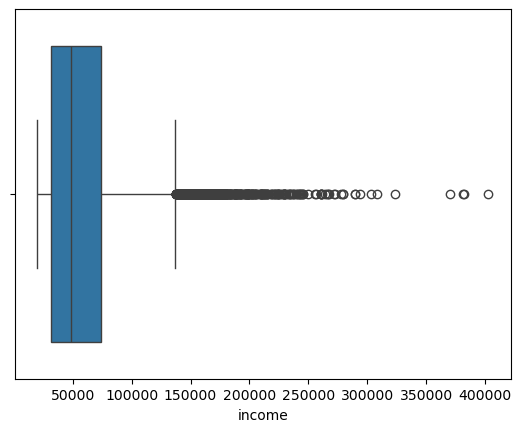

After Capping: income


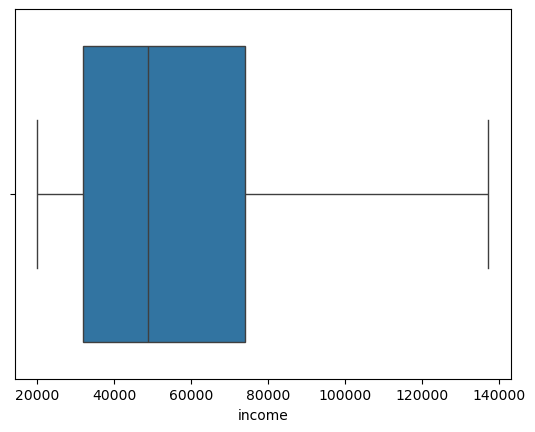

Before Capping: savings


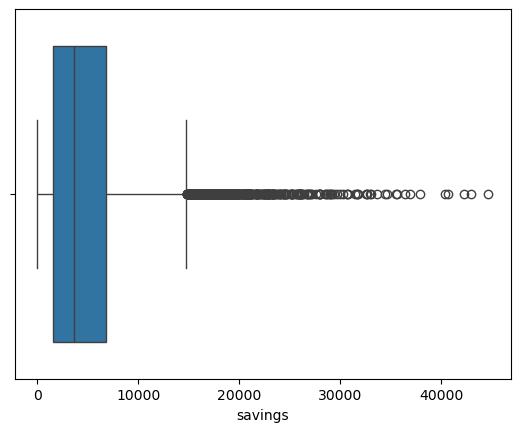

After Capping: savings


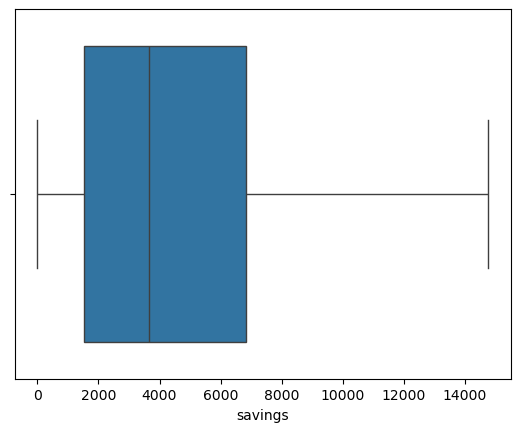

Before Capping: monthly_expenses


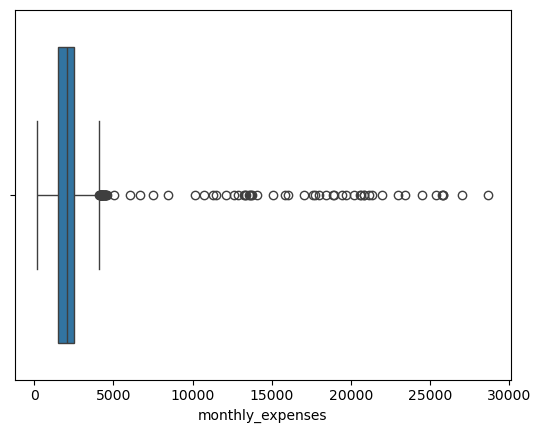

After Capping: monthly_expenses


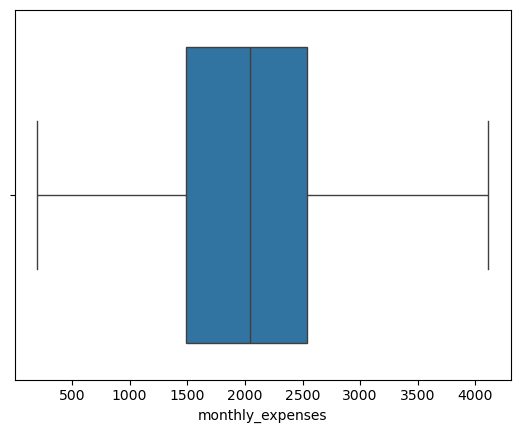

Before Capping: credit_score


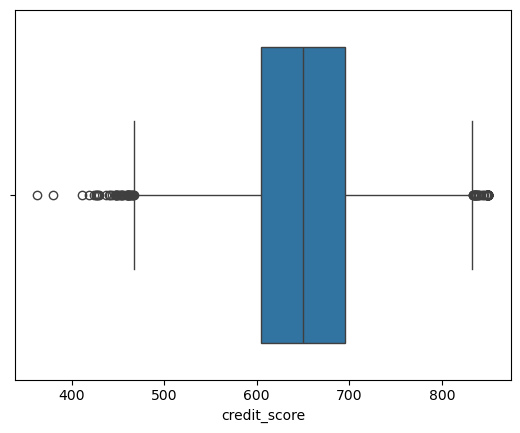

After Capping: credit_score


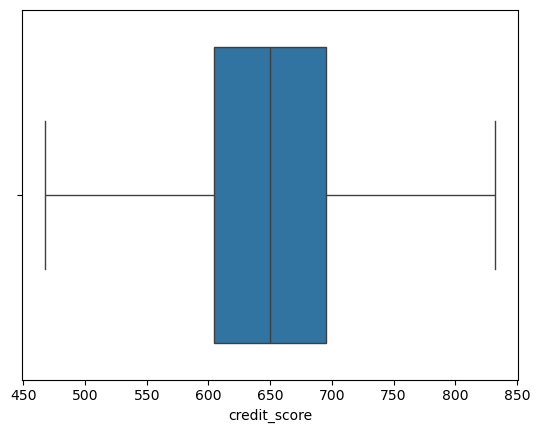

Before Capping: loan_amount


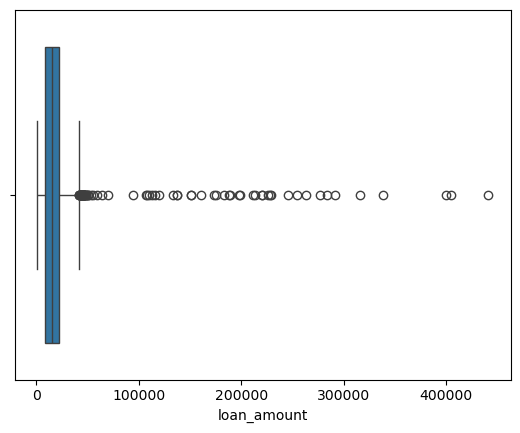

After Capping: loan_amount


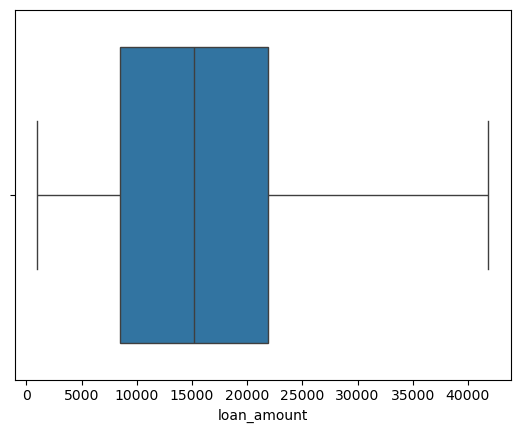

Before Capping: employment_years


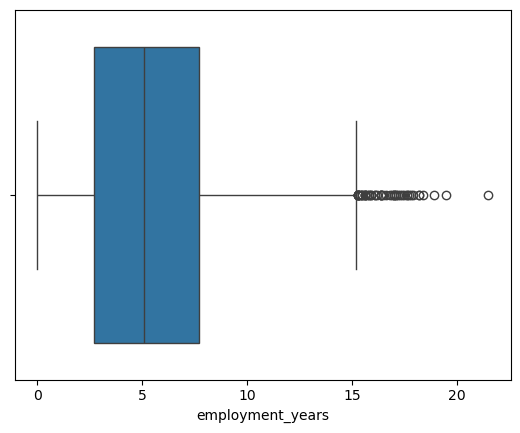

After Capping: employment_years


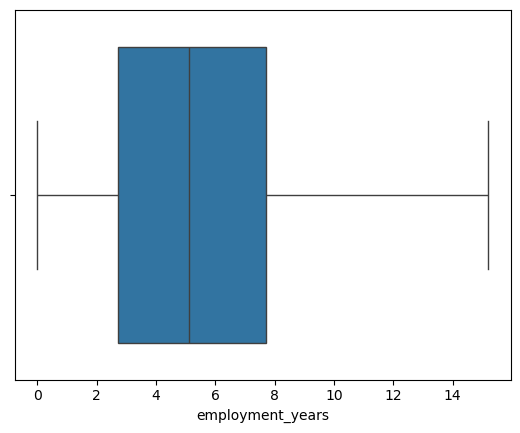

Before Capping: debt_to_income


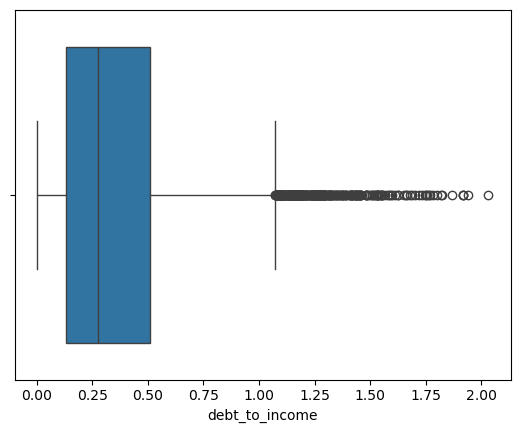

After Capping: debt_to_income


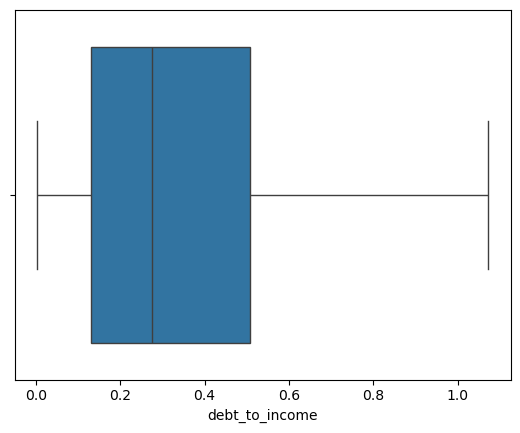

In [108]:
col_with_out = ['num_dependents','income','savings','monthly_expenses','credit_score','loan_amount','employment_years','debt_to_income']

for i in col_with_out:
    print(f'Before Capping: {i}')
    sns.boxplot(x=df[i])
    plt.show()
    
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + (1.5 * iqr)
    lo_limit = q1 - (1.5 * iqr)
    
    df[i] = np.where(df[i] > up_limit, up_limit,np.where(df[i] < lo_limit, lo_limit, df[i]))
    
    print(f'After Capping: {i}')
    sns.boxplot(x=df[i])
    plt.show()

#### Observe above graphs that before capping and after capping which means all outliers are removed

## Recency of Date for column 'signup_date'

In [109]:
df['signup_date']=pd.to_datetime(df['signup_date'])

In [110]:
latest_date=df['signup_date'].max()

In [111]:
latest_date

Timestamp('2023-06-23 00:00:00')

In [112]:
df['signup_date'].min()

Timestamp('2018-01-01 00:00:00')

In [113]:
df['signup_date_RECENCY_months']=(latest_date-df['signup_date']).dt.days/30

In [114]:
df.drop('signup_date',axis=1,inplace=True)

## Splitting data for training, testing the model with Class Balancing using SMOTE technique

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X=df.drop(['customer_id','target_default_risk'],axis=1)

In [117]:
X.shape

(10000, 28)

In [118]:
y=df[['target_default_risk']]

In [119]:
y.value_counts()

target_default_risk
1                      5132
0                      4868
Name: count, dtype: int64

#### Which 1's are of 5132 and 0's are of 4868 leads to class imbalance. Let's do SMOTE technique

In [120]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X,y)

In [121]:
y_smote.value_counts()

target_default_risk
0                      5132
1                      5132
Name: count, dtype: int64

#### Now we can observe equal number of binary classes which means data set is Balanced

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

## Random Forest and XG Bhoosting(It is not required Scaling)

#### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
y_pred_rf=rf.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [127]:
accuracy_score(y_test,y_pred_rf)

0.9264490988796883

In [128]:
print(confusion_matrix(y_test,y_pred_rf))

[[969  73]
 [ 78 933]]


In [129]:
f1_score(y_test,y_pred_rf)

0.9251363411006446

In [130]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1042
           1       0.93      0.92      0.93      1011

    accuracy                           0.93      2053
   macro avg       0.93      0.93      0.93      2053
weighted avg       0.93      0.93      0.93      2053



#### XG Boost

In [131]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [132]:
y_pred_xgb=xgb.predict(X_test)

In [133]:
from sklearn.metrics import r2_score

In [134]:
r2_score(y_test,y_pred_xgb)

0.8261635303497314

In [135]:
y_pred_xgb_classes = (y_pred_xgb > 0.5).astype(int)
accuracy_score(y_test,y_pred_xgb_classes)

0.9459327812956648

In [136]:
confusion_matrix(y_test,y_pred_xgb_classes)

array([[981,  61],
       [ 50, 961]], dtype=int64)

In [137]:
f1_score(y_test,y_pred_xgb_classes)

0.9454008853910477

In [138]:
print(classification_report(y_test,y_pred_xgb_classes))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1042
           1       0.94      0.95      0.95      1011

    accuracy                           0.95      2053
   macro avg       0.95      0.95      0.95      2053
weighted avg       0.95      0.95      0.95      2053



## Scaling using reuired Scalars for particular Columns

#### Once check the range of values for each column to select scaler

In [139]:
df.describe()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,...,education_ENCODED,marital_Divorced,marital_Married,marital_Single,marital_Widowed,region_East,region_North,region_South,region_West,signup_date_RECENCY_months
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.861600,57672.397673,4771.829989,2018.523712,1.211300,650.179189,15549.856262,45.642000,5.389600,0.047000,...,1.184000,0.100000,0.400200,0.448600,0.051200,0.255300,0.247900,0.252300,0.244500,33.282027
std,16.457987,32552.583542,4079.241999,784.995669,1.097257,68.313885,9348.627522,15.475134,3.389573,0.211649,...,1.025597,0.300015,0.489963,0.497376,0.220416,0.436052,0.431815,0.434354,0.429812,19.180481
min,18.000000,20001.000000,0.000000,200.000000,0.000000,467.196728,1000.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,31753.750000,1530.000000,1492.000000,0.000000,604.179183,8508.500000,36.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.791667
50%,46.000000,48620.500000,3649.000000,2042.000000,1.000000,650.155438,15174.500000,48.000000,5.100000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.033333
75%,60.000000,73914.000000,6826.000000,2540.000000,2.000000,695.500821,21843.750000,60.000000,7.700000,0.000000,...,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,49.900000
max,74.000000,137154.375000,14770.000000,4112.000000,5.000000,832.483277,41846.625000,72.000000,15.200000,1.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.633333


In [140]:
df.columns

Index(['customer_id', 'age', 'income', 'savings', 'monthly_expenses',
       'num_dependents', 'credit_score', 'loan_amount', 'loan_term_months',
       'employment_years', 'recent_default', 'has_credit_card',
       'signup_dayofweek', 'debt_to_income', 'sin_age', 'target_default_risk',
       'home_MORTGAGE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'education_ENCODED', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Widowed', 'region_East', 'region_North',
       'region_South', 'region_West', 'signup_date_RECENCY_months'],
      dtype='object')

#### In above describtion it didn't showing range for each columns, So let following code

In [141]:
s=0
for i in df.columns:
    print(f'Column name {i}',end=" ")
    print("Minimum",df[i].min(),end=" ")
    print("Maximum",df[i].max())
    s+=1
print(s)

Column name customer_id Minimum CUST000001 Maximum CUST010000
Column name age Minimum 18 Maximum 74
Column name income Minimum 20001.0 Maximum 137154.375
Column name savings Minimum 0.0 Maximum 14770.0
Column name monthly_expenses Minimum 200.0 Maximum 4112.0
Column name num_dependents Minimum 0.0 Maximum 5.0
Column name credit_score Minimum 467.19672754648116 Maximum 832.4832765205309
Column name loan_amount Minimum 1000.0 Maximum 41846.625
Column name loan_term_months Minimum 12 Maximum 72
Column name employment_years Minimum 0.0 Maximum 15.2
Column name recent_default Minimum 0 Maximum 1
Column name has_credit_card Minimum 0 Maximum 1
Column name signup_dayofweek Minimum 0 Maximum 6
Column name debt_to_income Minimum 0.004 Maximum 1.072
Column name sin_age Minimum -0.9999232575641008 Maximum 0.9738476308781954
Column name target_default_risk Minimum 0 Maximum 1
Column name home_MORTGAGE Minimum 0 Maximum 1
Column name home_OTHER Minimum 0 Maximum 1
Column name home_OWN Minimum 0 Max

#### Import all required scalers

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Define a different lists for different scalers

In [143]:
log_std_col=['income','loan_amount']
robust_col=['savings']
std_col=['age','monthly_expenses','loan_term_months','signup_date_RECENCY_months','sin_age']
minmax_col=['num_dependents','credit_score','employment_years','debt_to_income']
ordinal_col=['education_ENCODED']
onehot_col=['signup_dayofweek']
binary_col=['recent_default','has_credit_card','home_OTHER','home_OWN','home_RENT','marital_Married','marital_Single','marital_Widowed','region_North',
            'region_South','region_West']

In [144]:
log_std_pipeline=Pipeline([
    ('log', FunctionTransformer(lambda x:np.log1p(x),validate=False)),
    ('scalar',StandardScaler())
])

In [145]:
preprocessor=ColumnTransformer([
    ('log_std',log_std_pipeline,log_std_col),
    ('robust',RobustScaler(),robust_col),
    ('std',StandardScaler(),std_col),
    ('minmax',MinMaxScaler(),minmax_col),
    ('std_ord',StandardScaler(),ordinal_col),
    ('onehot',OneHotEncoder(handle_unknown='ignore'),onehot_col),
    ('pass','passthrough',binary_col)
])

#### Drawing the pipeline

In [146]:
from sklearn import set_config
set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('log_std',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(func=<function <lambda> at 0x00000217AA0B53A0>)),
                                                 ('scalar', StandardScaler())]),
                                 ['income', 'loan_amount']),
                                ('robust', RobustScaler(), ['savings']),
                                ('std', StandardScaler(),
                                 ['age', 'monthly_expenses', 'loan_term_months',
                                  'signup_date_RECENCY_months', 'sin_age']),
                                ('minmax', MinM...
                                  'employment_years', 'debt_to_income']),
                                ('std_ord', StandardScaler(),
                                 ['education_ENCODED']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['signup_dayofweek']),
                                ('pass', 'passthrough',
                                 ['recent_default', 'has_credit_card',
                                  'home_OTHER', 'home_OWN', 'home_RENT',
                                  'marital_Married', 'marital_Single',
                                  'marital_Widowed', 'region_North',
                                  'region_South', 'region_West'])])

#### Fitting and transforming X train and X test

In [147]:
X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled=preprocessor.fit_transform(X_test)

## Modeling

#### Import required models

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Defining all models in to list named "models"

In [149]:
models={
    'LogisticRegression':LogisticRegression(max_iter=1000,random_state=42),
    'DecisionTree':DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(n_estimators=100,random_state=42),
    'SupportVector':SVC(probability=True,random_state=42),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metrics='logloss',random_state=42)
}

#### Using following code we can know each metrics for each model

In [150]:
for name,model in models.items():
    print(f'\nTraining and Evaluating {name}')
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)

    acc=accuracy_score(y_test,y_pred)
    print(f"Accuracy Score of {name} : {acc:.4f}")

    print(f"Confusion matrix of {name} :")
    print(confusion_matrix(y_test,y_pred))
    
    print(f"Classification report of {name} :")
    print(classification_report(y_test,y_pred))


Training and Evaluating LogisticRegression
Accuracy Score of LogisticRegression : 0.9216
Confusion matrix of LogisticRegression :
[[953  89]
 [ 72 939]]
Classification report of LogisticRegression :
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1042
           1       0.91      0.93      0.92      1011

    accuracy                           0.92      2053
   macro avg       0.92      0.92      0.92      2053
weighted avg       0.92      0.92      0.92      2053


Training and Evaluating DecisionTree
Accuracy Score of DecisionTree : 0.9109
Confusion matrix of DecisionTree :
[[934 108]
 [ 75 936]]
Classification report of DecisionTree :
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1042
           1       0.90      0.93      0.91      1011

    accuracy                           0.91      2053
   macro avg       0.91      0.91      0.91      2053
weighted avg       0.91  

#### Once observing above, Accuracy is high for XGBoost

#### But our Aim is to get accuracy higher, Now let's do Hyperparameter tuning using Grid Search

#### Grid Search for Logistic Regresson

In [151]:
from sklearn.model_selection import GridSearchCV

param_lr={
    'C':[0.01,0.1,1,10],
    'penalty':['l2'],
    'solver':['lbfgs','saga'],
    'max_iter':[500]
}
grid_lr=GridSearchCV(LogisticRegression(),param_lr,cv=5,scoring='accuracy',n_jobs=-1)
grid_lr.fit(X_train_scaled,y_train)
y_pred_lr=grid_lr.predict(X_test_scaled)

print("Best Logistic Regression params :", grid_lr.best_params_)
print("Best Logistic Regression scores :",grid_lr.best_score_)
print("Classification Report of Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Best Logistic Regression params : {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression scores : 0.9311894183644043
Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1042
           1       0.91      0.93      0.92      1011

    accuracy                           0.92      2053
   macro avg       0.92      0.92      0.92      2053
weighted avg       0.92      0.92      0.92      2053



#### Decision Tree model using Grid Search

In [152]:
param_dt={
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}
grid_dt=GridSearchCV(DecisionTreeClassifier(),param_dt,cv=5,scoring='accuracy',n_jobs=-1)
grid_dt.fit(X_train_scaled,y_train)
y_pred_dt=grid_dt.predict(X_test_scaled)

print("Best Decision Tree params :", grid_dt.best_params_)
print("Best Decision Tree scores :",grid_dt.best_score_)
print("Classification Report of Decision tree:\n", classification_report(y_test, y_pred_dt))

Best Decision Tree params : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree scores : 0.948847248467829
Classification Report of Decision tree:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      1042
           1       0.91      0.94      0.92      1011

    accuracy                           0.92      2053
   macro avg       0.92      0.92      0.92      2053
weighted avg       0.92      0.92      0.92      2053



#### Random Forest using Randomize Search

In [153]:
from sklearn.model_selection import RandomizedSearchCV

param_rf = {
    'n_estimators': [100, 250, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rand_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_rf,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

rand_rf.fit(X_train, y_train)
y_pred_rf=rand_rf.predict(X_test)

print("Best Random Forest params:", rand_rf.best_params_)
print("Best Random Forest CV accuracy:", rand_rf.best_score_)
print("Classification Report of Random Forest:\n", classification_report(y_test, y_pred_rf))

Best Random Forest params: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Best Random Forest CV accuracy: 0.955789852939759
Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1042
           1       0.95      0.95      0.95      1011

    accuracy                           0.95      2053
   macro avg       0.95      0.95      0.95      2053
weighted avg       0.95      0.95      0.95      2053



#### Support Vector Machines using Grid Search

In [184]:
param_svm={
    'C':[0.1,1,10],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto']
}
grid_svm=GridSearchCV(SVC(),param_svm,cv=5,scoring='accuracy',n_jobs=-1)
grid_svm.fit(X_train_scaled,y_train)
y_pred_svm=grid_svm.predict(X_test_scaled)

print("Best SVM params :", grid_svm.best_params_)
print("Best SVM scores :",grid_svm.best_score_)
print("Classification Report of SVM :\n", classification_report(y_test, y_pred_svm))

Best SVM params : {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM scores : 0.9386183439431892
Classification Report of SVM :
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1042
           1       0.92      0.93      0.93      1011

    accuracy                           0.93      2053
   macro avg       0.93      0.93      0.93      2053
weighted avg       0.93      0.93      0.93      2053



#### XGBoost using Grid Search

In [186]:
param_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                        param_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
y_pred_xgb_1=grid_xgb.predict(X_test)

print("Best XGB params :", grid_xgb.best_params_)
print("Best XGB scores :",grid_xgb.best_score_)
print("Classification Report of XGBoost:\n", classification_report(y_test, y_pred_xgb_1))

Best XGB params : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best XGB scores : 0.9577387699486175
Classification Report of XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1042
           1       0.95      0.95      0.95      1011

    accuracy                           0.95      2053
   macro avg       0.95      0.95      0.95      2053
weighted avg       0.95      0.95      0.95      2053



#### Using grid search We getting Highest accuracy for XGBoost which is 0.957

#### Now lets do predicting using perceptron model

In [179]:
from sklearn.linear_model import Perceptron

perc = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perc.fit(X_train_scaled, y_train)

y_pred_perc = perc.predict(X_test_scaled)

print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perc))
print("Classification Report of Perceptron:\n", classification_report(y_test, y_pred_perc))

Perceptron Accuracy: 0.792498782269849
Classification Report of Perceptron:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76      1042
           1       0.72      0.94      0.82      1011

    accuracy                           0.79      2053
   macro avg       0.82      0.79      0.79      2053
weighted avg       0.82      0.79      0.79      2053



#### Accuracy for perceptron is too low

#### Predicting using ANN

In [162]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(64,32), 
                    activation='relu',
                    solver='adam',
                    max_iter=300,
                    random_state=42)

ann.fit(X_train_scaled, y_train)
y_pred_ann = ann.predict(X_test_scaled)

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Classification Report of ANN:\n", classification_report(y_test, y_pred_ann))

ANN Accuracy: 0.9103750608865075
Classification Report of ANN:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1042
           1       0.91      0.91      0.91      1011

    accuracy                           0.91      2053
   macro avg       0.91      0.91      0.91      2053
weighted avg       0.91      0.91      0.91      2053



#### Accuracy is any how low Lets go for Grid search for ANN

In [156]:
param_ann = {
    'hidden_layer_sizes': [(50,50), (100,50), (150,100,25), (200,100,50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01], 
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300] 
}

grid_ann = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=param_ann,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_ann.fit(X_train_scaled, y_train)

print("Best ANN params:", grid_ann.best_params_)
print("Best ANN CV score:", grid_ann.best_score_)

y_pred_ann_grid = grid_ann.predict(X_test_scaled)

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Classification Report of ANN:\n", classification_report(y_test, y_pred_ann_grid))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best ANN params: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'adam'}
Best ANN CV score: 0.9509190801710725
ANN Accuracy: 0.913297613248904
Classification Report of ANN:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1042
           1       0.93      0.95      0.94      1011

    accuracy                           0.94      2053
   macro avg       0.94      0.94      0.94      2053
weighted avg       0.94      0.94      0.94      2053



#### Increasing hidden layers in ANN

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_a = Sequential()
model_a.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_a.add(Dense(64, activation='relu'))
model_a.add(Dense(32, activation='relu'))
model_a.add(Dense(16, activation='relu'))
model_a.add(Dense(8, activation='relu'))
model_a.add(Dense(1, activation='sigmoid'))

model_a.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model_a.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

y_pred_ann_a = (model_a.predict(X_test_scaled) > 0.5).astype(int)
print(accuracy_score(y_test, y_pred_ann_a))
print(classification_report(y_test, y_pred_ann_a))

Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8833 - loss: 0.3122 - val_accuracy: 0.9079 - val_loss: 0.2685
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9279 - loss: 0.2266 - val_accuracy: 0.9152 - val_loss: 0.2487
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9314 - loss: 0.2070 - val_accuracy: 0.9196 - val_loss: 0.2337
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9393 - loss: 0.1889 - val_accuracy: 0.9255 - val_loss: 0.2287
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.1787 - val_accuracy: 0.9255 - val_loss: 0.2475
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.1673 - val_accuracy: 0.9279 - val_loss: 0.2239
Epoch 7/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1643 - val_accuracy: 0.9118 - val_loss: 0.2503
Epoch 8/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.1552 - val_accuracy: 0.

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7400 - loss: 0.5334 - val_accuracy: 0.8722 - val_loss: 0.3417
Epoch 2/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8462 - loss: 0.3660 - val_accuracy: 0.9020 - val_loss: 0.2827
Epoch 3/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3281 - val_accuracy: 0.9124 - val_loss: 0.2563
Epoch 4/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8911 - loss: 0.2899 - val_accuracy: 0.9239 - val_loss: 0.2378
Epoch 5/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8956 - loss: 0.2752 - val_accuracy: 0.9318 - val_loss: 0.2165
Epoch 6/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9016 - loss: 0.2717 - val_accuracy: 0.9288 - val_loss: 0.2124
Epoch 7/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9059 - loss: 0.2556 - val_accuracy: 0.9361 - val_loss: 0.1991
Epoch 8/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9090 - loss: 0.2550 - val_accu

#### Downloading Modified Data Set

In [164]:
df.to_csv("modified_synthetic_dataset.csv", index=False)

## Final Observation

### Best Model Overall: XGBoost (95% accuracy, best CV score).

### Close Competitors: Random Forest (95%) and ANN (94%).

### Logistic Regression & SVM: Good baseline models with ~92–93%.

### Decision Tree: Decent, but less robust than ensemble methods.

#### Multiple machine learning models were evaluated for classification. Logistic Regression and Decision Tree achieved around 92% accuracy, while SVM slightly improved with 93%. The Artificial Neural Network reached 94%, showing good generalization. Ensemble methods performed the best, with Random Forest and XGBoost both achieving 95% accuracy, where XGBoost emerged as the most effective model overall.